In [ ]:
!pip install pandas
!pip install networkx

# Reducing the search space
I think that there are 4^N orientations of the protein for Project Euler #300
Many of these orientations are not possible because they have amino acids that are overlapping other amino acids.
If we pin the first amino acid in the chain to position (0,0), then the second protein can have 4 possible positions. Every amino acid, after the second one, can have at most 3 possible positions, relative to the previous amino acid due to opverlap. So therefore the maximum possible number of orientations is 4 * 3^N-1. In this notebook I am trying to find how to reduce this number farther. All positions are relative to the previous node. The search space for N = 4, is the search space for N = 3, plus 3 more orientations of the last amino, for each orientation of N = 3. We can reduce the search space to 3^N-1 becuase all different orientations of the first 2 orientations are symmetrical.

<bound method Mapping.values of NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39))>


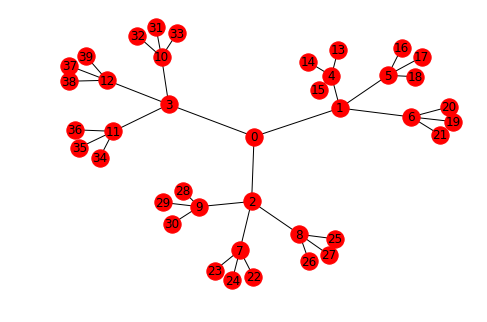

In [150]:
# libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N = 5

Tree = nx.balanced_tree(3,N-2)

#nx.set_node_attributes(Tree,0,"A")
print(Tree.node.values)

# Plot it
nx.draw(Tree, with_labels=True)
plt.show()


The search space represented as a graph.
Need to have at least 5 nodes to have an overlap.
An overlap is equivalent to a cycle in the graph. 

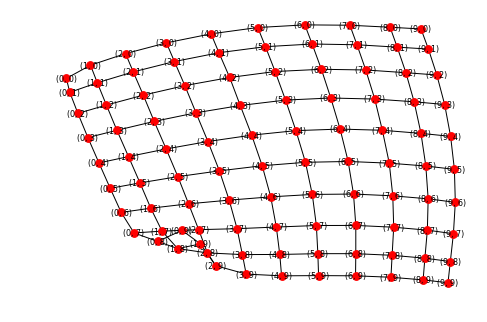

<Figure size 4500x4500 with 0 Axes>

In [194]:
# libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N = 5

# 2D grid graph
Tree = nx.grid_2d_graph(2*N, 2*N, periodic=False, create_using=None)
#Tree=nx.Graph()
#for i in range(2*N):
##    for j in range(2*N):
#        if i + j <= N:
#            Tree.add_node((i,j))

# Plot it
nx.draw(Tree, node_size=60,font_size=8,with_labels=True)

# larger figure size
plt.figure(figsize=(30, 30), dpi=150)
plt.show()


I think a DFS on this graph with depth of N can search all possible paths without overlap.

In [171]:
# Search space represented as a list
# Assuming that nodes 0 and 1 are fixed at poisions (0,0) and (1,0). 
#The first element of the list is the position of the 3rd node relative to the second node

# -1 = left turn
# 0 = No turn
# 1 = Right turn

N = 5

relative_orientations = [[int(x)-1 for x in list(reversed(list(np.base_repr(i,3).zfill(N-2))))] for i in range(3**(N-2))]
relative_orientations


[[-1, -1, -1],
 [0, -1, -1],
 [1, -1, -1],
 [-1, 0, -1],
 [0, 0, -1],
 [1, 0, -1],
 [-1, 1, -1],
 [0, 1, -1],
 [1, 1, -1],
 [-1, -1, 0],
 [0, -1, 0],
 [1, -1, 0],
 [-1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [-1, 1, 0],
 [0, 1, 0],
 [1, 1, 0],
 [-1, -1, 1],
 [0, -1, 1],
 [1, -1, 1],
 [-1, 0, 1],
 [0, 0, 1],
 [1, 0, 1],
 [-1, 1, 1],
 [0, 1, 1],
 [1, 1, 1]]

Anytime there are 3 1's or 3 -1's in a row there is an overlap

The above notebook was train of thought style.
I think that the optimal search of different orientations of a protein is a DFS of the nodes of a cartesian grid starting at point 1,0 with depth N-2. This has a runtime of O(V+E) = O((N-2)^2 + (N-3)^2 + (N-2)^2).
Which means that the runtime of Euler 300 will be roughly O((N-2)^2 * 2^(N))